# Laboratorium 13
### Minimalizacja funkcji

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import copy as cp

Najpierw zaimportujmy potrzebne biblioteki.

### 1. Problem komiwojażera

Wygeneruj chmurę n losowych punktów w 2D, a następnie zastosuj algorytm symulowanego wyżarzania do przybliżonego rozwiązania problemu komiwojażera dla tych punktów.

In [2]:
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)


def path(pts):
    res = 0
    for i in range(len(pts)):
        res += dist(pts[i-1], pts[i])
    return res
        

def visPath(pts, title='', subplot=None):
    if subplot is None:
        plt.figure(figsize=(8,8))
    else:
        plt.subplot(1,2,subplot)
    pts = np.append(pts, pts[0]).reshape((-1,2))
    plt.plot(*zip(*pts))
    plt.title(title+"Total "+str(path(pts)))
    if subplot is None:
        plt.show()

Funkcje pomocnicze związane z punktami.\
Poniżej funkcje związane z symulowaniem wyżarzania.

In [3]:
def tempM(temp, m=0.7):
    return m*temp

def rev(gipts, i, j):
    pts = cp.deepcopy(gipts)
#     print(pts[i], pts[j])
#     pts[i], pts[j] = pts[j], pts[i]
#     print(pts[i], pts[j])
    pts[[i,j]] = pts[[j,i]]
    return pts
    
    
def cons(pts):
    ran = np.random.randint(0, len(pts))
    return rev(pts, ran, (ran+1)%len(pts)), ran, (ran+1)%len(pts)


def arb(pts):
    fi = np.random.randint(0, len(pts))
    sec = np.random.randint(0, len(pts))
    while sec == fi:
        sec = np.random.randint(0, len(pts))
    return rev(pts, fi, sec), fi, sec


def prob(diff, temp):
    return np.exp(-abs(diff)/temp)


def calc(pts, i, j):
    prev = 0
    curr = 0
    if abs(i-j)>1 and abs(i-j)<len(pts)-1:
        for x in range(-1, 2):
            if x==0:
                continue
            curr+=dist(pts[i], pts[(i+x)%len(pts)])
            curr+=dist(pts[j], pts[(j+x)%len(pts)])
            prev+=dist(pts[i], pts[(j+x)%len(pts)])
            prev+=dist(pts[j], pts[(i+x)%len(pts)])
    else:
#         if (i>j and i*j!=0 and i+j!=len(pts)) or (i+j==len(pts)-1 and i*j==0 and i<j):
#             i,j=j,i
        if i>j:
            i,j=j,i
        if i*j==0 and i+j==len(pts)-1 and i<j:
            i,j=j,i
        curr+=dist(pts[i], pts[(i-1)%len(pts)])
        curr+=dist(pts[j], pts[(j+1)%len(pts)])
        prev+=dist(pts[i], pts[(j+1)%len(pts)])
        prev+=dist(pts[j], pts[(i-1)%len(pts)])
    return curr-prev
    

def simannealing(pts, perm, mod, temp, its, ftemp=tempM, his=False, ver=True):
    hist = {}
    if his:
        hist = {0: {'state': pts, 'cost': path(pts), 'temp': temp, 'acc': True}}
    cost = path(pts)
    best = {'state': pts, 'cost': cost}
    totits=its
    its-=1
    while its>0 and temp>1e-8:
        nei, fi, sec = perm(pts)
#         neiCost = path(nei)
        diff = calc(pts, fi, sec)
        neiCost=cost-diff
#         if cost-neiCost-diff>1e-7:
#             print(totits-its, cost+neiCost-diff, cost+neiCost, diff)
        if best['cost']>neiCost:
            best['cost']=neiCost
            best['state']=nei

        if his:
            hist[totits-its] = {'state': nei, 'cost': neiCost, 'temp': temp}
        if diff>0 or prob(diff, temp) >= np.random.random():
            pts = nei
            cost = neiCost
            if his:
                hist[totits-its]['acc'] = True
        elif his:
            hist[totits-its]['acc'] = False

        its-=1
        temp = ftemp(temp, mod)
    
    if ver:
        print(totits-its)
    if his:
        return best, hist
    else:
        return best

##### a) Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości n oraz 3 różnych układów punktów w 2D (rozkład jednostajny, rozkład normalny z czterema różnymi grupami parametrów, dziewięć odseparowanych grup punktów).

In [4]:
def genUni(n, ran=(-5,5)):
    return np.random.uniform(*ran, (n, 2))


def gen1Norm(n, loc=(0,0), scale=(1,1)):
    return np.column_stack((np.random.normal(loc[0], scale[0], n),np.random.normal(loc[1], scale[1], n)))


def genNorm(n, loc=None, scale=None):
    if scale is None:
        scale = [(1,1),(1,1),(1,1),(1,1)]
    if loc is None:
        loc = [(0,0),(0,0),(0,0),(0,0)]
    pts = gen1Norm(n//4, loc[-1], scale[-1])
    for i in range(3):
#         pts = np.append(pts, gen1Norm(n//4, loc[0], scale[0]))
        pts = np.row_stack((pts, gen1Norm(n//4, loc[i], scale[i])))
    return pts


def genGrps(n, scale=0.3):
    pts=[]
    for i in range(-3, 4, 3):
        for j in range(-3, 4, 3):
#             pts = np.append(pts, np.random.normal(i, scale, n//9))
#             pts = np.append(pts, np.random.normal(j, scale, n//9))
            pts = np.append(pts, np.column_stack((np.random.normal(i, scale, n//9), np.random.normal(j, scale, n//9))))
    return pts.reshape((-1,2))

def disp(pts, title="", subplot=None):
    if subplot is not None:
        plt.subplot(1,2,subplot)
    plt.scatter(*zip(*pts))
    plt.title(title)
    if subplot is None:
        plt.show()

Najpierw przetestujmy narzędzia wykorzystywane.

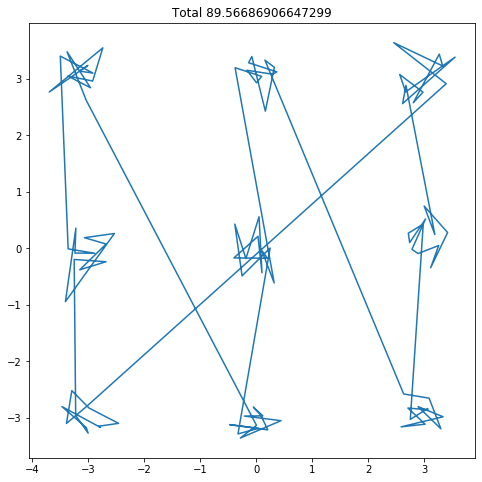

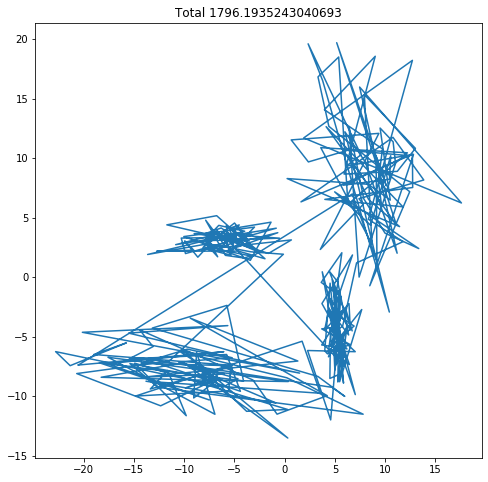

In [5]:
visPath(genGrps(100))
visPath(genNorm(300, [(-6,3), (5,-4), (8,9), (-9,-8)], [(3,1), (1,3), (4,5), (7,2)]))

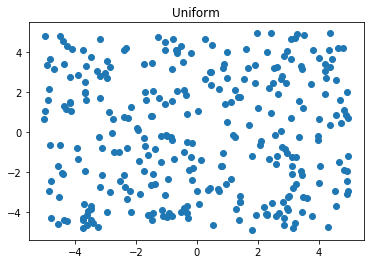

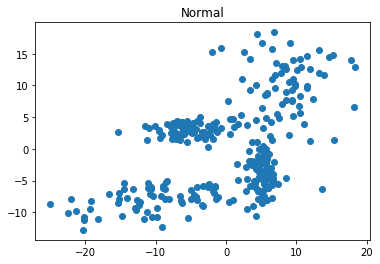

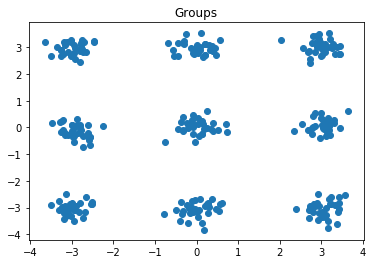

In [6]:
disp(genUni(300), title="Uniform")
disp(genNorm(300, [(-6,3), (5,-4), (8,9), (-9,-8)], [(3,1), (1,3), (4,5), (7,2)]), title="Normal")
disp(genGrps(300, 0.3), title="Groups")

In [7]:
def genpoints(small=False):
    if small:
        N=[100]
    else:
        N = [100, 500, 1000]
    loc = [(-6,3), (5,-4), (8,9), (-9,-8)]
    scale = [(3,1), (1,3), (4,5), (7,2)]
    pts = []
    for n in N:
        pts.append(genUni(n))

    for n in N:
        pts.append(genNorm(n, loc, scale))

    for n in N:
        pts.append(genGrps(n))

    ptsarb = cp.deepcopy(pts)
    ptscon = cp.deepcopy(pts)
    return pts, ptsarb, ptscon

Teraz zobaczmy wyżarzanie.

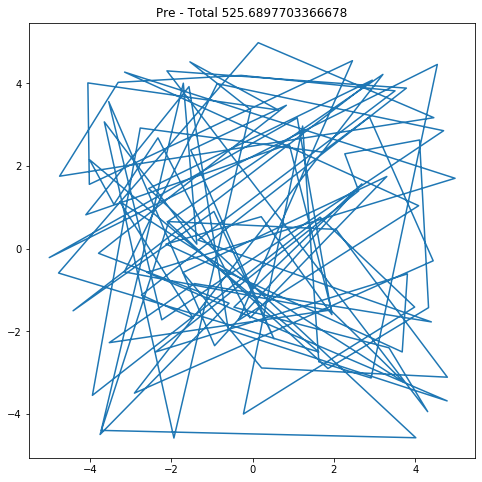

9198


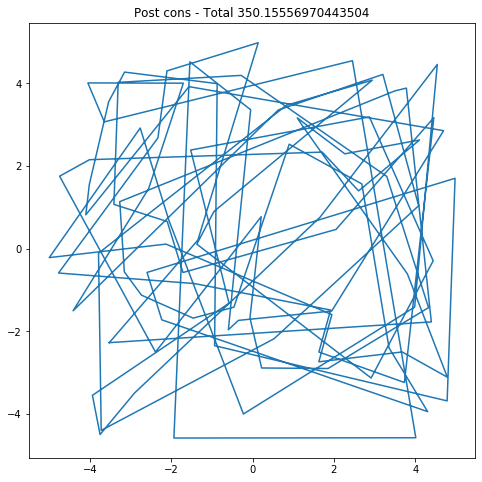

9198


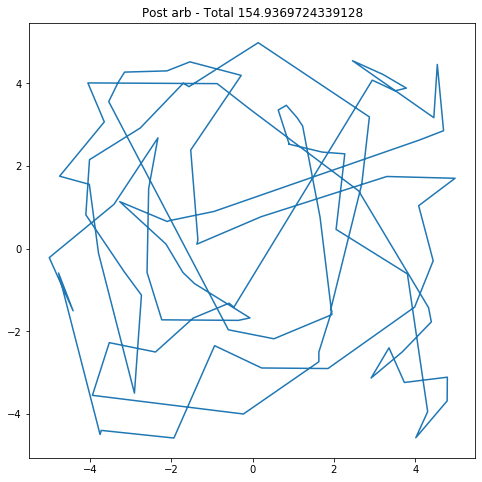

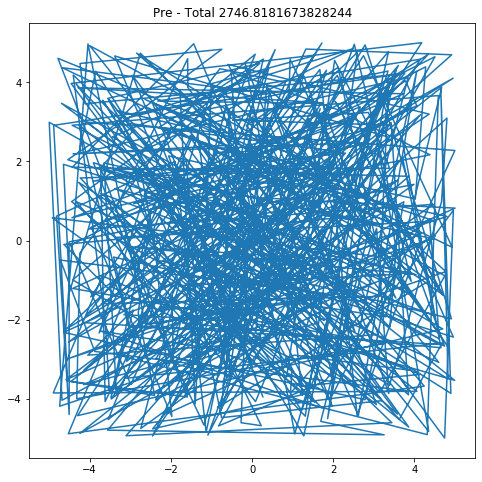

9198


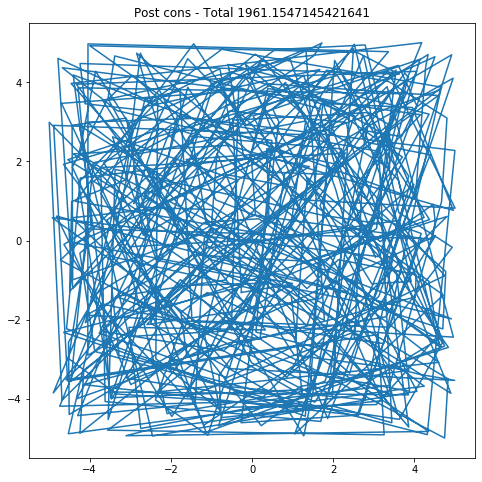

9198


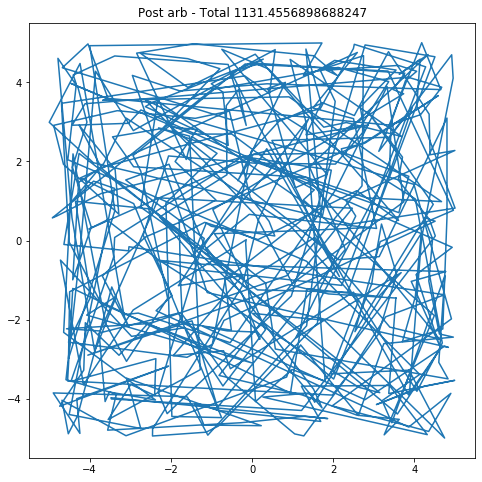

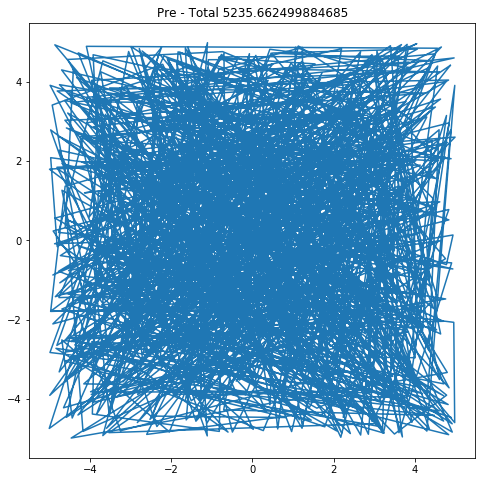

9198


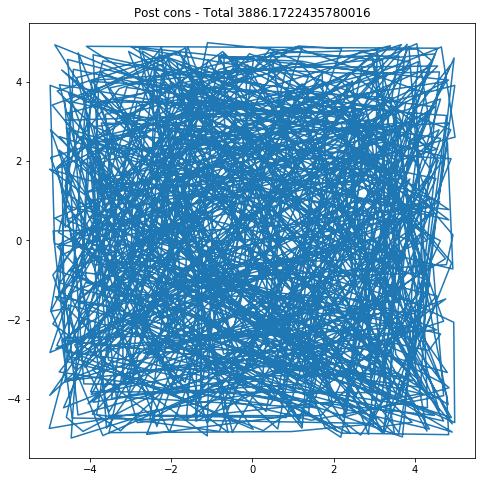

9198


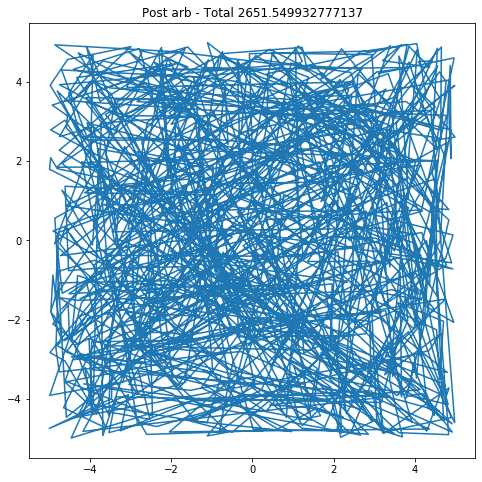

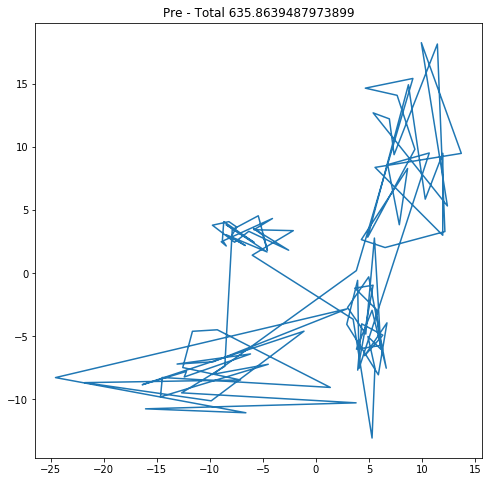

9198


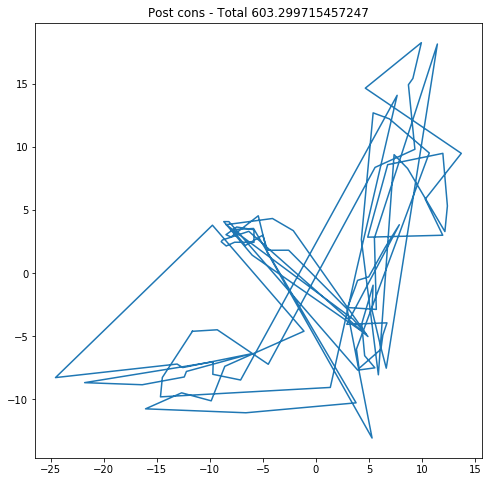

9198


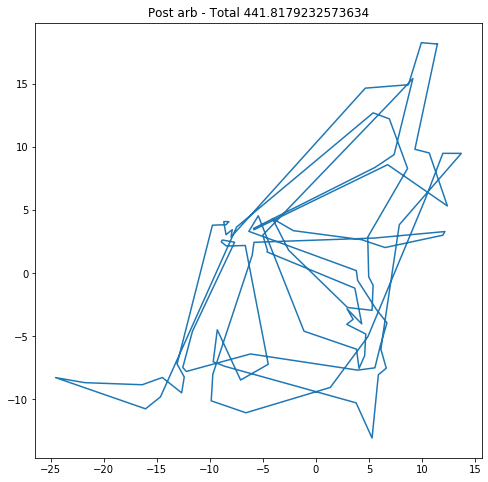

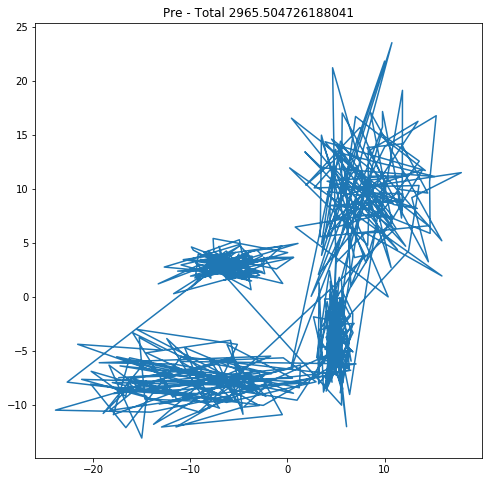

9198


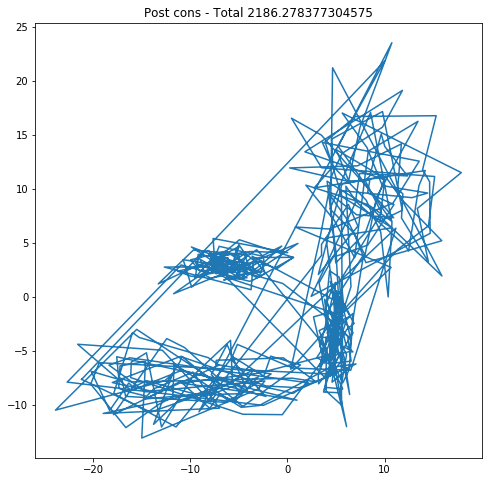

9198


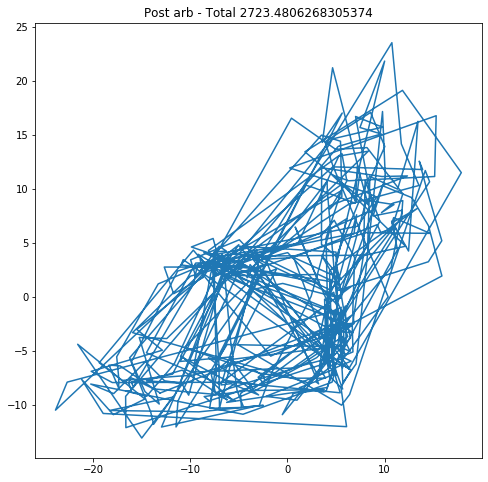

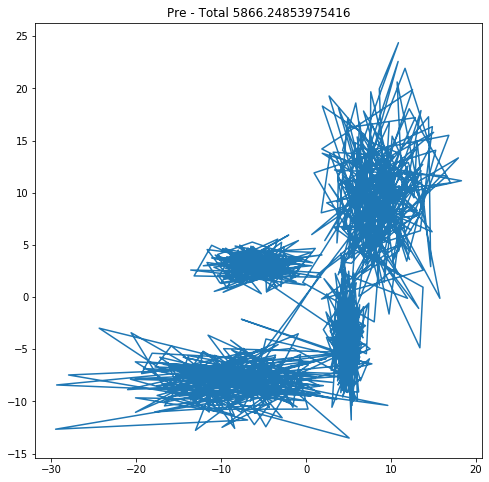

9198


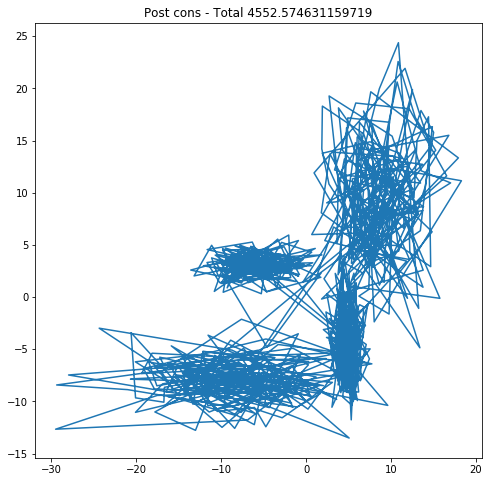

9198


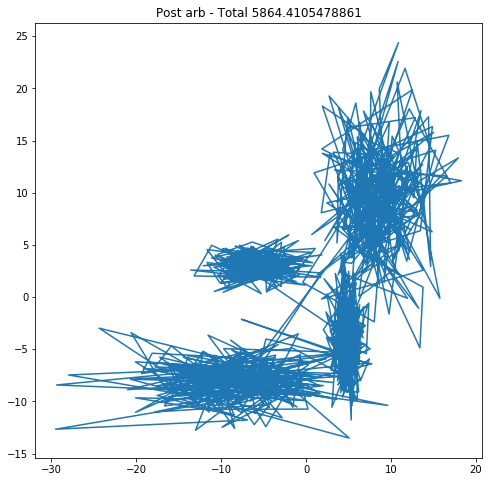

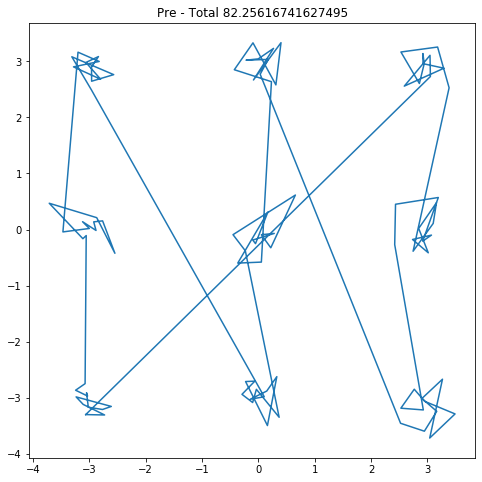

9198


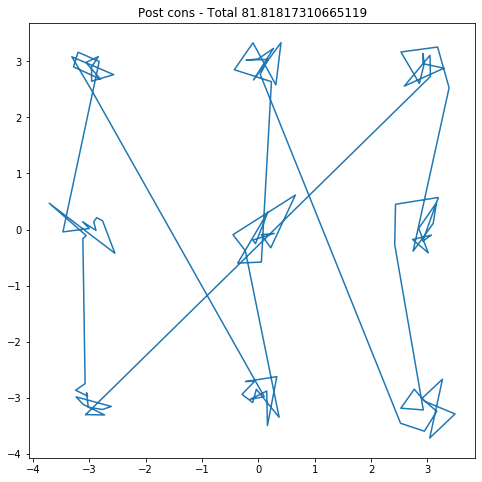

9198


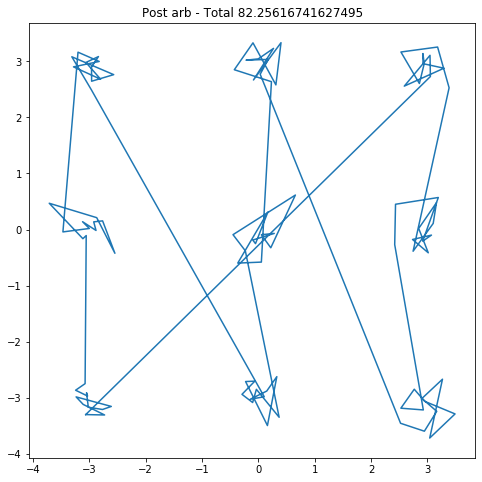

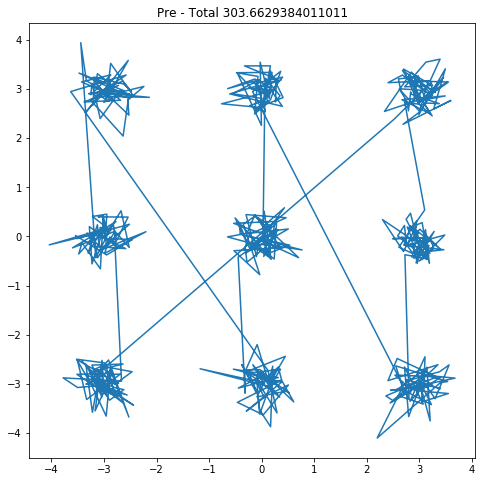

9198


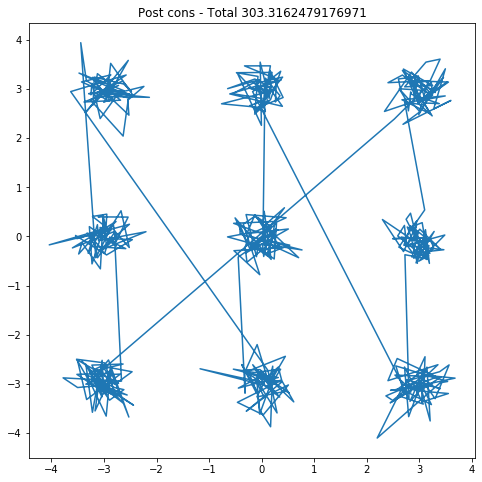

9198


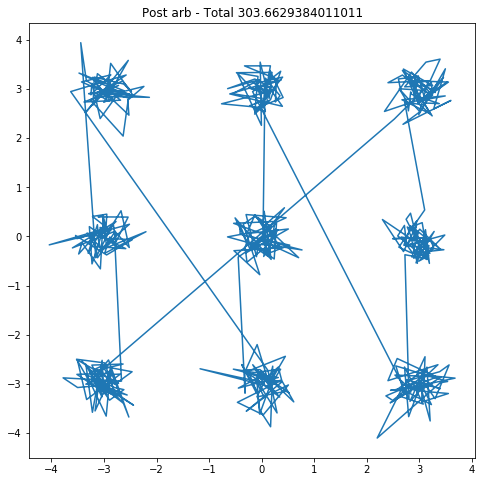

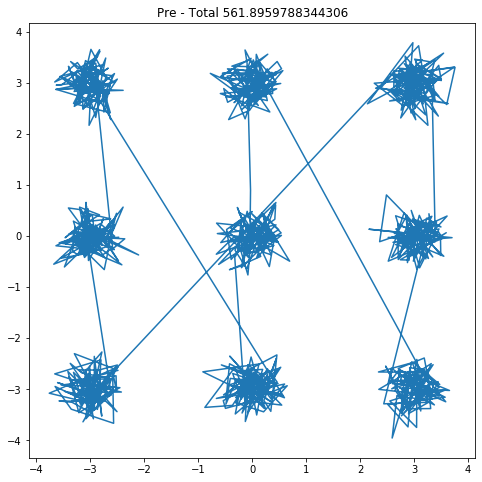

9198


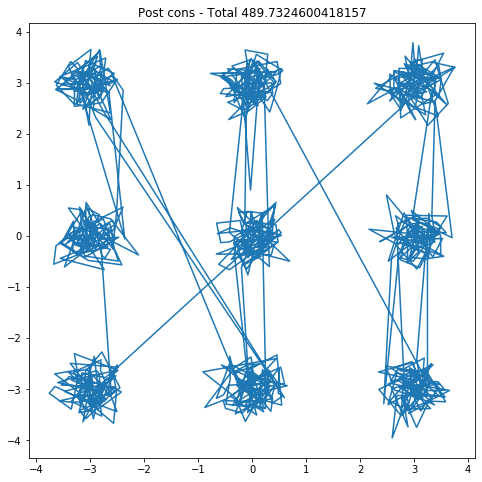

9198


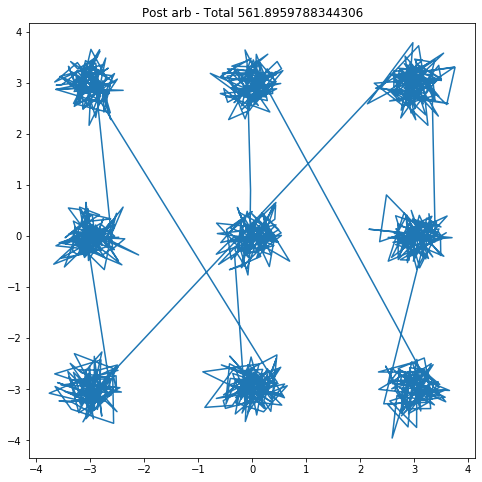

In [8]:
pts, ptsarb, ptscon = genpoints()
for ix in range(len(pts)):
    visPath(pts[ix], 'Pre - ')
    visPath(simannealing(ptscon[ix], cons, 0.997, 10000, 100000, tempM)['state'], 'Post cons - ')
    visPath(simannealing(ptsarb[ix], arb, 0.997, 10000, 100000, tempM)['state'], 'Post arb - ')

Jak widać, symulowanie wyżarzania poprawia wyniki, czasem lepiej, czasem gorzej.\
Dużo zależy od ułożenia punktów, co dobrze ilustrują wybrane zbiory punktów (dla każdego n z {100, 500, 1000} i dla każdego z trzech wymienionych wcześniej typów [mam nadzieję, że widać, które są jakie] i za każdym razem wejście obu programów, wynik z consecutive swap oraz wynik z arbitrary swap = 3\*3\*3).\
Dzięki wyliczaniu względnej zmiany w długości ścieżek, udało się dużo zaoszczędzić na czasie wykonania(zamiast każdorazowo wyliczać w złożoności O(n)), co niestety może nie być możliwe dla każdego problemu.\
Jest to algorytm bardzo zależny od szybkości wyliczania funkcji kosztu.\
Jeśliby wykorzystać lepszą funkcję obniżania temperatury (zamiast wykładniczej można użyć zwykłego odejmowania, czy innej wolniej zbieżnej do 0 funkcji), to możnaby z łatwością wykonywać więcej iteracji, aczkolwiek w tym naszym zastosowaniu myślę, że ~5500 powinno być zadowaljące. 

Symulowanie wyżarzania opiera się w dużym stopniu na losowości, więc sporo może zależeć od szczęścia, jednak przy sporej liczbie iteracji, skutki "pecha" powinny się minimalizować i co więcej, odrobinę sterując losowością, możemy czasem znacząco wpłynąc na efekt końcowy.

##### b) Zbadaj wpływ sposobu generacji sąsiedniego stanu (consecutive swap - zamiana kolejności losowej pary połączonych wierzchołków w ścieżce vs. arbitrary swap - zamiana dwóch losowych wierzchołków w ścieżce) oraz początkowej wartości temperatury na zbieżność procesu optymalizacji.

Jak mogliśmy zauważyć w poprzednim podpunkcie (dopiero teraz zwracam na to uwagę, ale korzystając z poprzednio wygenerowanych wykresów), wyniki zazwyczaj są lepsze od wersji pierwotnej, jednak czasem ta różnica jest znaczna, a czasem znikoma.\
Jeżeli przyjrzymy się tym wykresom, możemy zaobserwować, że w przypadkach bardzo chaotycznych (najbardziej rozkład normalny) arbitrary swap radzi sobie dużo lepiej od consecutive swap, podobnie gdy nie mamy za dużo punktów, arbitrary swap dobrze daje radę. Logicznie spodziewamy się, że ma on większy potencjał, gdy nie wiemy za dużo o zbiorze, lub jak już napisałem, jest on niewielki/chaotyczny, ponieważ bardzo mocno opiera się na losowości.\
Jeśli chodzi o consecutive swap, to z wykresów możemy wywnioskować, że sprawdza się on bardzo dobrze, w sytuacji gdy zbiór jest bardziej uporządkowany (elementy od podobnym indeksie są niedaleko od siebie), co widać na pozostałych typach wykresów (normalne i 9 takich samych), gdzie mamy mniej więcej pogrupowane punkty i wszystkie w dosyć małej okolicy były losowane "naraz". Logicznie spodziewamy się, że sprawdzi się on lepiej gdy wiemy coś więcej o punktach i punkty o bliskich indeksach są raczej blisko siebie (wtedy mamy też mniejszą wartość poprawy), albo są w jakimś zygzaku.

Sprawdźmy teraz na zależność sposobu generacji sąsiedniego stanu oraz wartości początkowej temperatury na zbieżność procesu optymalizacji.

In [ ]:
def visHist(hist, ix, title):
    plt.subplot(1,2,ix)
#     plt.plot(*zip(*hist['state']))
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    allstates = []
    accstatesy = []
    accstatesx = []
    for i in hist.keys():
        allstates.append(hist[i]['cost'])
        if hist[i]['acc']:
            accstatesy.append(hist[i]['cost'])
            accstatesx.append(i)
    plt.plot(allstates, color='red')
    accstatesx += [i]
    accstatesy += [accstatesy[-1]]
    plt.plot(accstatesx, accstatesy, color='green')

In [ ]:
pts, ptsarb, ptscon = genpoints()
for ix in range(len(pts)):
    plt.figure(figsize=(15, 5))
    disp(pts[ix], 'Data', 1)
    bstcon,histcon = simannealing(ptscon[ix], cons, 0.995, 10000, 100000, tempM, his=True)
    bstarb,histarb = simannealing(ptsarb[ix], arb, 0.995, 10000, 100000, tempM, his=True)
    if bstcon['cost']>bstarb['cost']:
        visPath(bstarb['state'], 'Best result - Arbitrary', 2)
    else:
        visPath(bstcon['state'], 'Best result - Consecutive', 2)
    plt.show()
    plt.figure(figsize=(15, 5))
    visHist(histcon, 1, 'Consecutive')
    visHist(histarb, 2, 'Arbitrary')
    plt.show()

Jak widać wyniki są zgodne z oczekiwaniami, kolor czerwony przedstawia stany które losujemy, natomiast kolor zielony reprezentuje stany, które akceptujemy(najlepszy stan jest zapamiętany osobno).\
W tym przypadku(co często się powtarza, ale może się czasem zmienić), wypiszę dla każdego gdzie wyniki są lepsze:
- Arbitrary:
    - Rozkład jednostajny dla wszystkich n
    - Łączony rozkład jednostajny dla n=100
- Consecutive:
    - Łączone rozkłady jednostajne dla n=500, 1000
    - Rozkład normalne w 9 grupach dla wszystkich n
    
    
Warto zwrócić uwagę, że niektóre wykresy mają różne skale na osiach!

Analizując tylko kształty wykresów, możemy zwrócić uwagę głównie na to, że zazwyczaj Arbitrary swap dużo szybciej rośnie i maleje, oraz nie ma aż takiego problemu z nasyceniem jak consecutive swap. Natomiast przy tak specyficznych danych, jakie mamy (Normalne łączone 4 i 9, dla dużych n), arbitrary swap bardzo szybko "psuje" wynik na tyle, że później już ma problem z odratowaniem sytuacji. Możliwe, że gdyby zastosować rozsądniejsze funkcje prawdopodobieństwa i temperatury, to wychodziłoby lepiej, jednak nie wiem jak miałyby one wyglądać, a nie znalazłem w internecie przystępnego rozwiązania.

Teraz zobaczmy wpływ temperatury.

In [ ]:
pts, ptsarb, ptscon = genpoints()
for ix in range(len(pts)):
    xs = [i for i in range(10, 10011, 1000)]
    disp(pts[ix], 'Data')
    rescon = []
    resarb = []
    for i in range(10, 10011, 1000):
        ptstmp = cp.deepcopy(pts[ix])
        rescon.append(simannealing(ptscon[ix], cons, 0.995, i, 100000, tempM, ver=False)['cost'])
        ptstmp = cp.deepcopy(pts[ix])
        resarb.append(simannealing(ptsarb[ix], arb, 0.995, i, 100000, tempM, ver=False)['cost'])
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(xs, rescon)
    plt.title('Consecutive')
    plt.xlabel('Starting temperature')
    plt.ylabel('Best cost')
    plt.subplot(1,2,2)
    plt.plot(xs, resarb)
    plt.title('Arbitrary')
    plt.xlabel('Starting temperature')
    plt.ylabel('Best cost')
    plt.show()

Bardzo dziwne wychodzą te zależności między temperaturą a zbieżnością wyżarzania, prawdopodobnie wynika to z nienajlepszych funkcji temperatury i prawdopodobieństwa.\
Rzeczy na które możemy zwrócić uwagę, to na pewno fakt, że dużo zależy od szczęścia i zwiększnie temeratury nie zawsze przekłada się bezpośrednio na lepsze wyniki.

##### c) Przedstaw wizualizację działania procedury minimalizującej funkcję celu

In [ ]:
def anim(hist, name='hist.gif'):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    
    ax.set_title(f"iteration={0} loss=" +str(hist[0]['cost']))
    hist[0]['state'] = np.append(hist[0]['state'], hist[0]['state'][0]).reshape((-1,2))
    line = ax.plot(*zip(*hist[0]['state']))[0]
    line.set_color('green')
    
    def anime(key):
        hist[key]['state'] = np.append(hist[key]['state'], hist[key]['state'][0]).reshape((-1,2))
        line.set_data(*zip(*hist[key]['state']))
        if hist[key]['acc']==True:
            line.set_color('green')
        else:
            line.set_color('red')
            
        ax.set_title(f'iteration={key} loss='+str(hist[key]['cost']))
    
    anim = FuncAnimation(fig, anime, interval=500, frames=len(hist))
    anim.save(name, writer='pillow')

In [ ]:
pts, ptsarb, ptscon = genpoints(True)
for ix in range(len(pts)):
    bstcon,histcon = simannealing(ptscon[ix], cons, 0.70, 10, 1000, tempM, his=True)
    bstarb,histarb = simannealing(ptsarb[ix], arb, 0.70, 10, 1000, tempM, his=True)
    anim(histarb, f'arb{ix}.gif')
    anim(histcon, f'con{ix}.gif')

Ze względu na duże obciążenie pamięci i czasu ograniczyłem liczbę klatek do 60.\
Kolor czerwony symbolizuje stan odrzucony, zielony - stan zaakceptowany.\
Bardzo ładnie można zaobserwować, jakie zmiany proponują odpowiednie podejścia, szczeóglnie przy tych bardziej uporządkowanych gdzie widać, że consecutive zamienia kolejnością miejsca stosunkowo niedaleko od siebie.

### <center> Arbitrary Jednostajny </center>
![SegmentLocal](arb0.gif "segment")
### <center> Consecutive Jednostajny </center>
![SegmentLocal](con0.gif "segment")
### <center> Arbitrary Normalny </center>
![SegmentLocal](arb1.gif "segment")
### <center> Consecutive Normalny </center>
![SegmentLocal](con1.gif "segment")
### <center> Abritrary 9 grup </center>
![SegmentLocal](arb2.gif "segment")
### <center> Consecutive 9 grup </center>
![SegmentLocal](con2.gif "segment")

In [9]:
### <center> Arbitrary Jednostajny </center>
![SegmentLocal](arb0.gif "segment")
### <center> Consecutive Jednostajny </center>
![SegmentLocal](con0.gif "segment")
### <center> Arbitrary Normalny </center>
![SegmentLocal](arb1.gif "segment")
### <center> Consecutive Normalny </center>
![SegmentLocal](con1.gif "segment")
### <center> Abritrary 9 grup </center>
![SegmentLocal](arb2.gif "segment")
### <center> Consecutive 9 grup </center>
![SegmentLocal](con2.gif "segment")

5514
5514


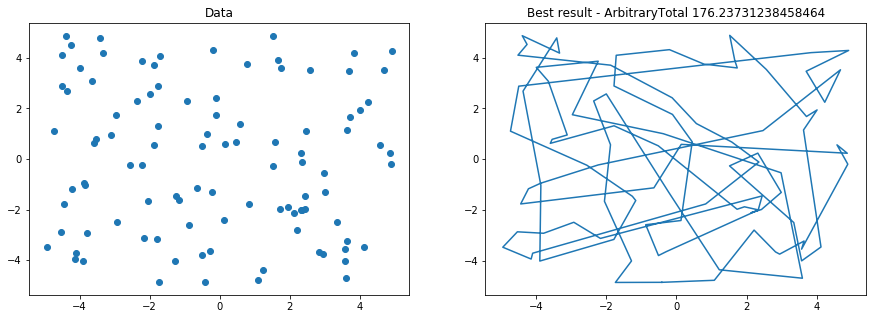

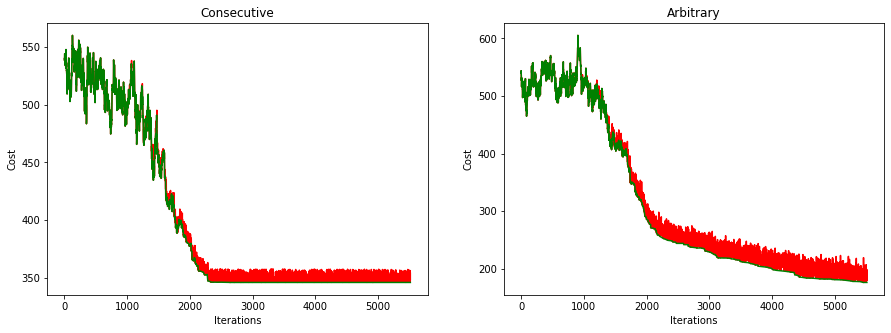

5514
5514


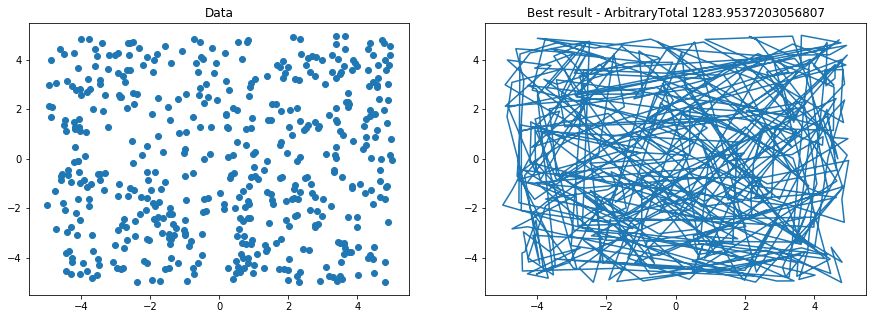

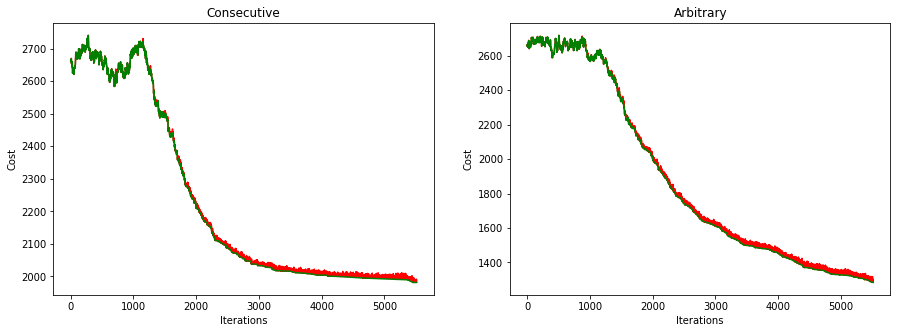

5514
5514


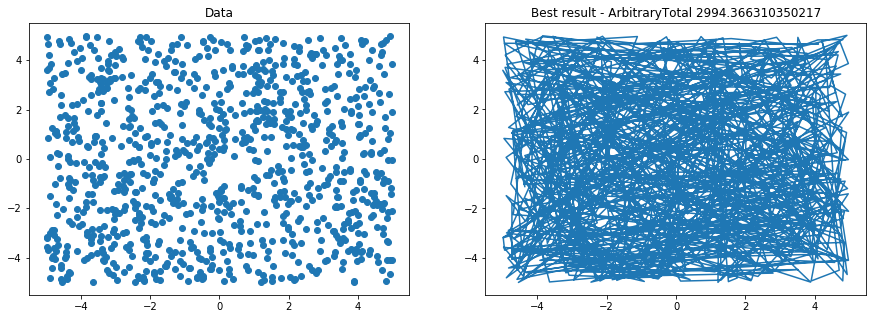

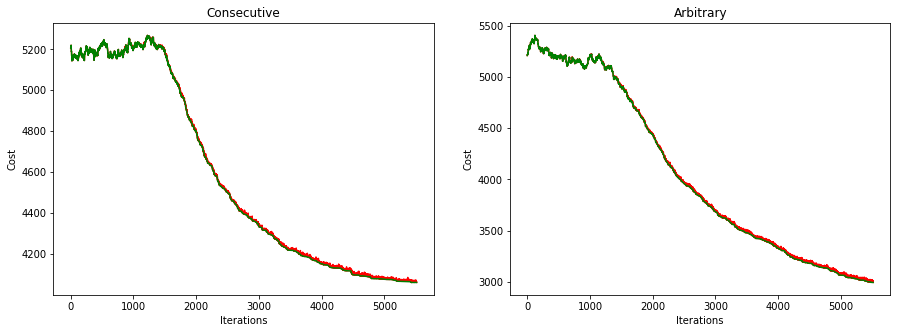

5514
5514


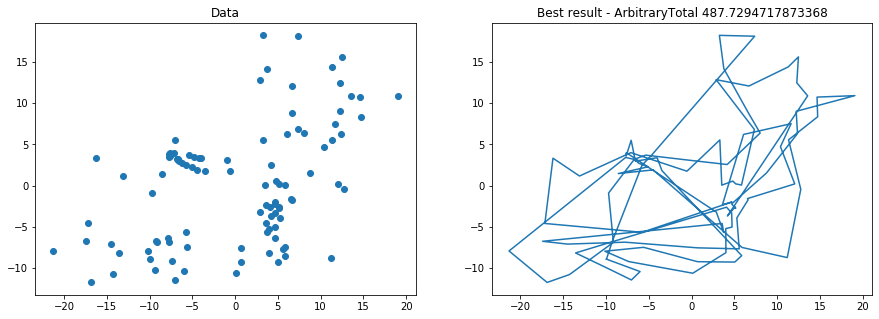

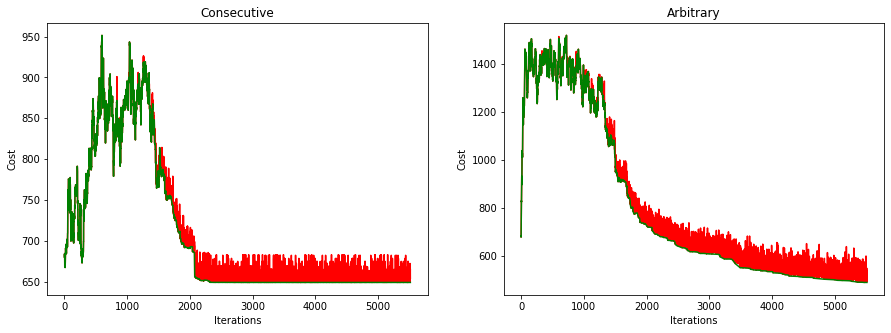

5514
5514


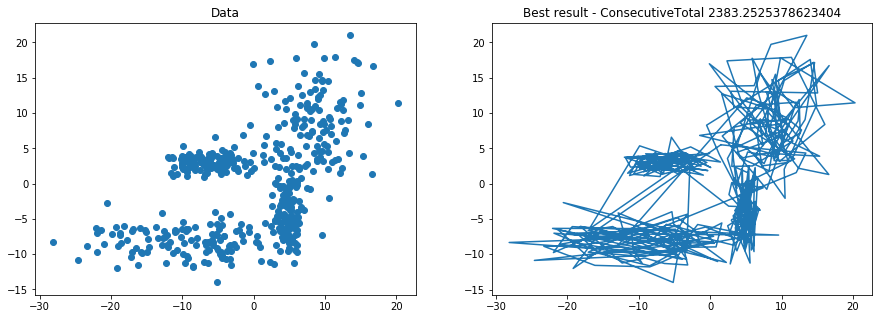

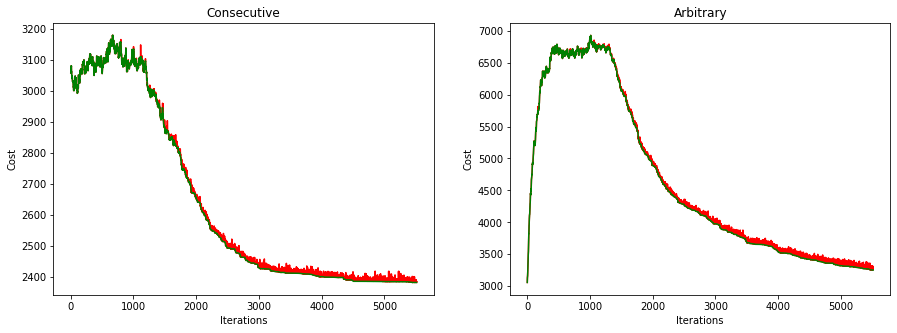

5514
5514


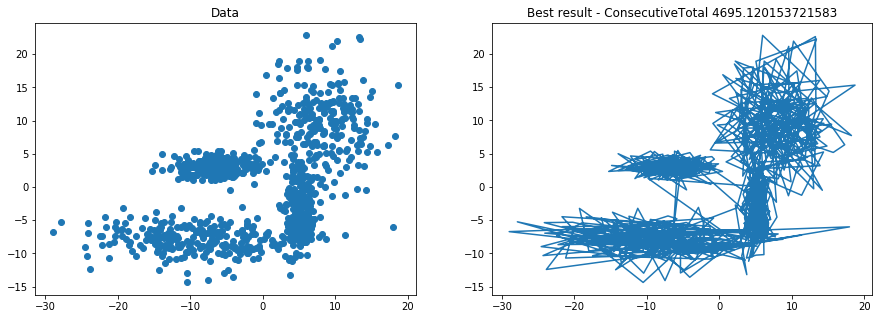

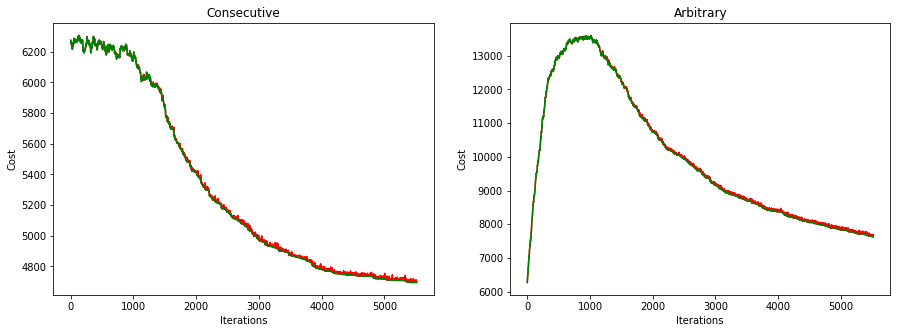

5514
5514


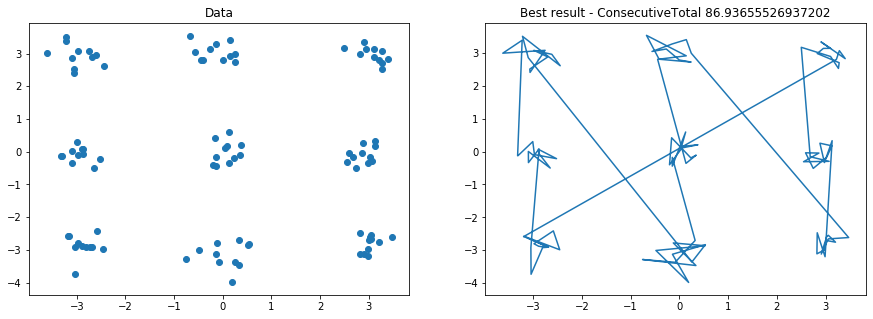

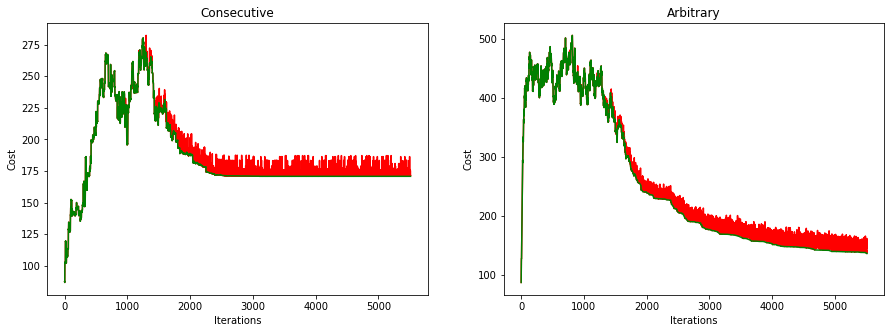

5514
5514


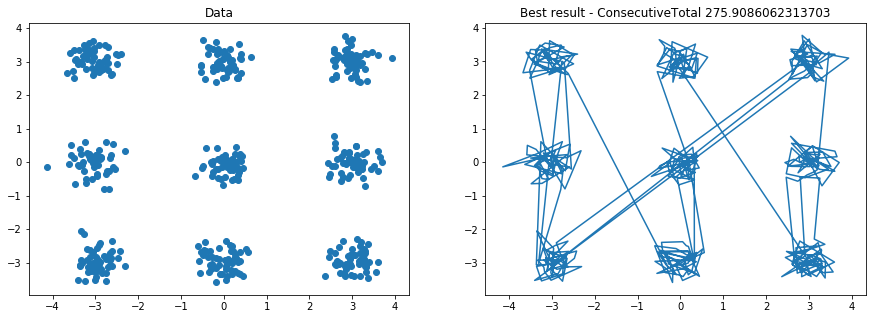

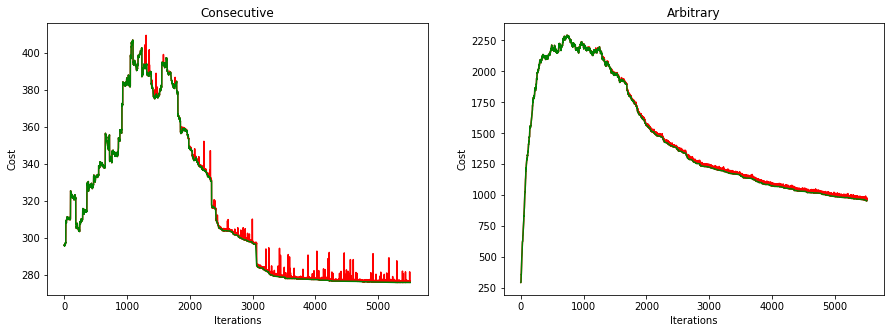

5514
5514


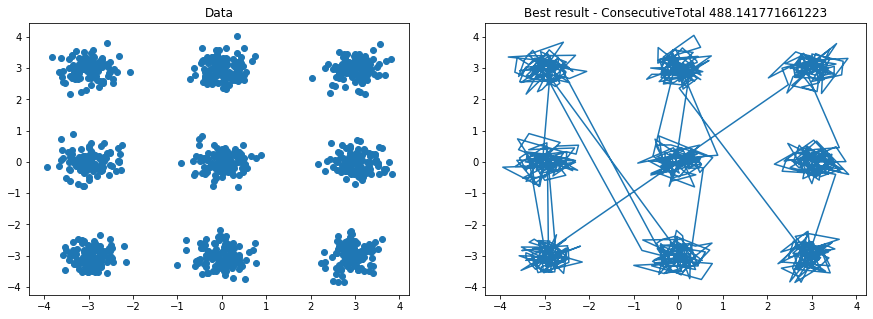

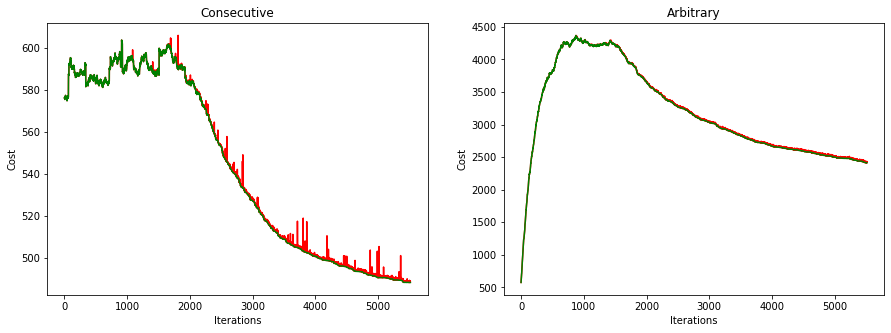

In [10]:
pts, ptsarb, ptscon = genpoints()
for ix in range(len(pts)):
    plt.figure(figsize=(15, 5))
    disp(pts[ix], 'Data', 1)
    bstcon,histcon = simannealing(ptscon[ix], cons, 0.995, 10000, 100000, tempM, his=True)
    bstarb,histarb = simannealing(ptsarb[ix], arb, 0.995, 10000, 100000, tempM, his=True)
    if bstcon['cost']>bstarb['cost']:
        visPath(bstarb['state'], 'Best result - Arbitrary', 2)
    else:
        visPath(bstcon['state'], 'Best result - Consecutive', 2)
    plt.show()
    plt.figure(figsize=(15, 5))
    visHist(histcon, 1, 'Consecutive')
    visHist(histarb, 2, 'Arbitrary')
    plt.show()

Jak widać wyniki są zgodne z oczekiwaniami, kolor czerwony przedstawia stany które losujemy, natomiast kolor zielony reprezentuje stany, które akceptujemy(najlepszy stan jest zapamiętany osobno).\
W tym przypadku(co często się powtarza, ale może się czasem zmienić), wypiszę dla każdego gdzie wyniki są lepsze:
- Arbitrary:
    - Rozkład jednostajny dla wszystkich n
    - Łączony rozkład jednostajny dla n=100
- Consecutive:
    - Łączone rozkłady jednostajne dla n=500, 1000
    - Rozkład normalne w 9 grupach dla wszystkich n
    
    
Warto zwrócić uwagę, że niektóre wykresy mają różne skale na osiach!

Analizując tylko kształty wykresów, możemy zwrócić uwagę głównie na to, że zazwyczaj Arbitrary swap dużo szybciej rośnie i maleje, oraz nie ma aż takiego problemu z nasyceniem jak consecutive swap. Natomiast przy tak specyficznych danych, jakie mamy (Normalne łączone 4 i 9, dla dużych n), arbitrary swap bardzo szybko "psuje" wynik na tyle, że później już ma problem z odratowaniem sytuacji. Możliwe, że gdyby zastosować rozsądniejsze funkcje prawdopodobieństwa i temperatury, to wychodziłoby lepiej, jednak nie wiem jak miałyby one wyglądać, a nie znalazłem w internecie przystępnego rozwiązania.

Teraz zobaczmy wpływ temperatury.

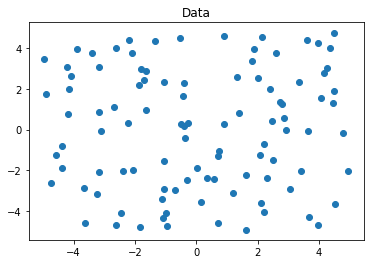

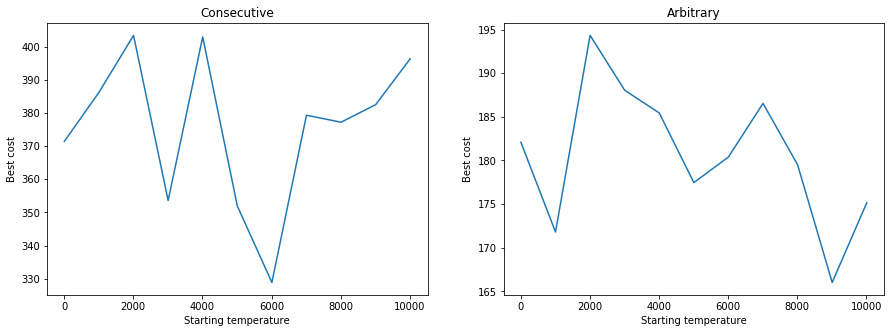

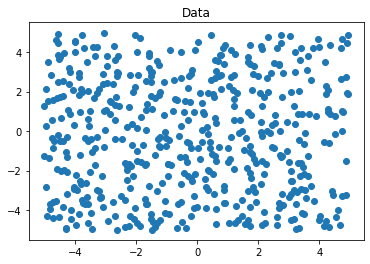

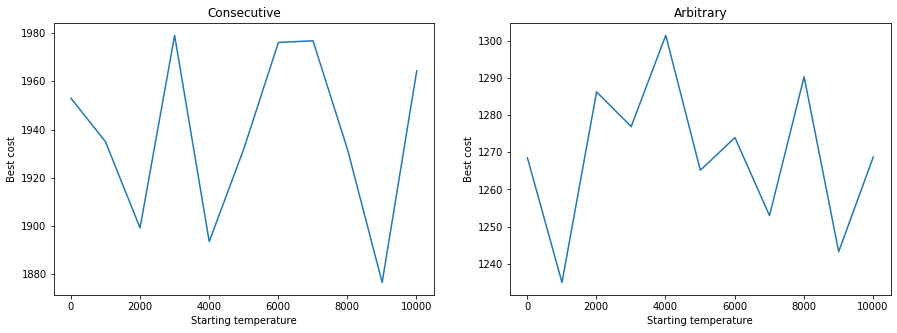

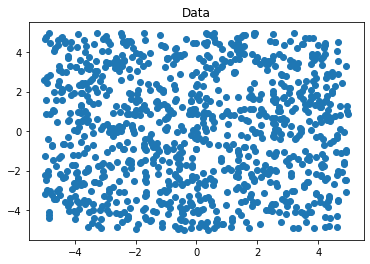

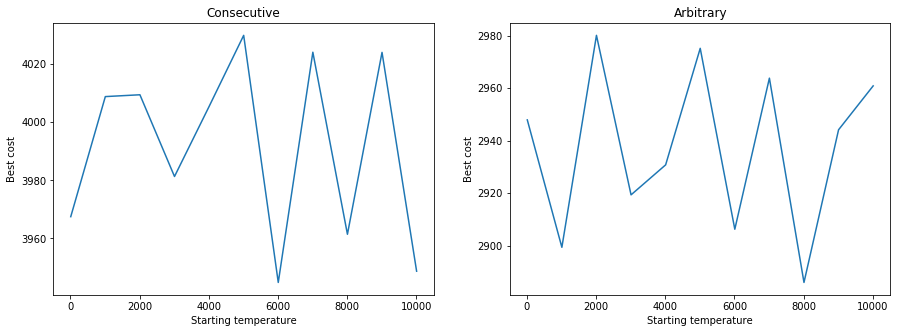

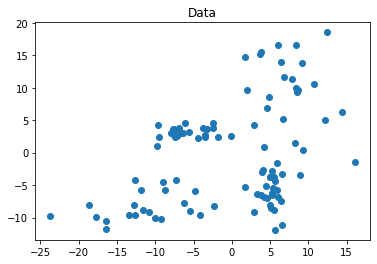

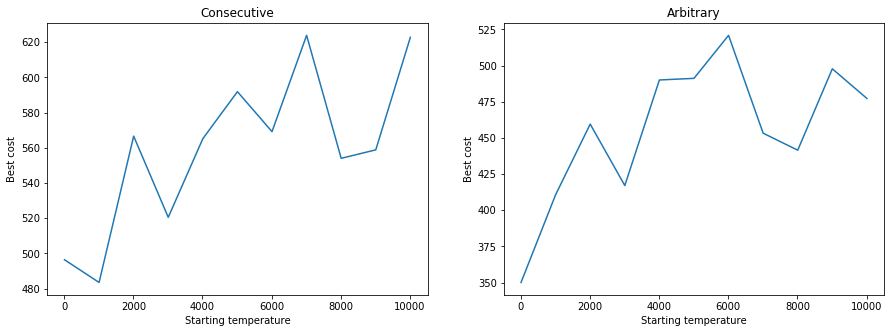

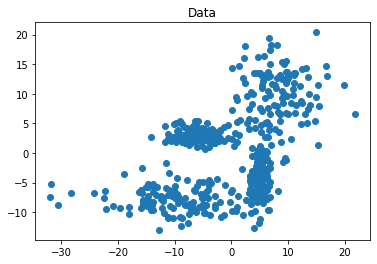

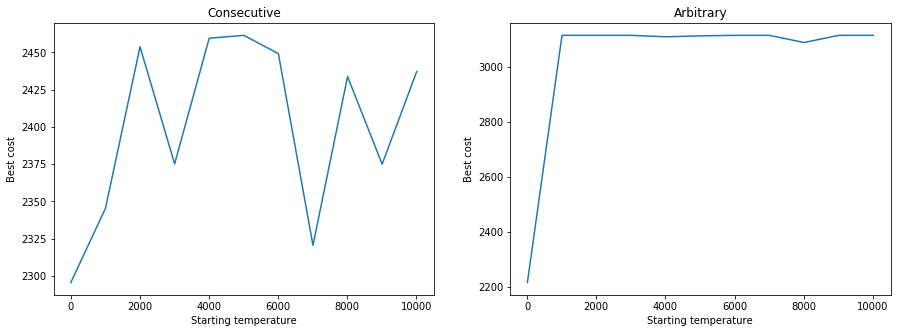

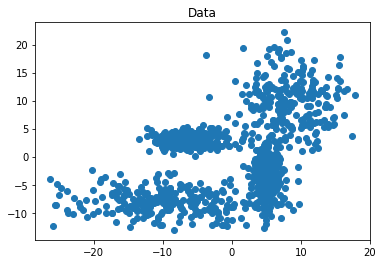

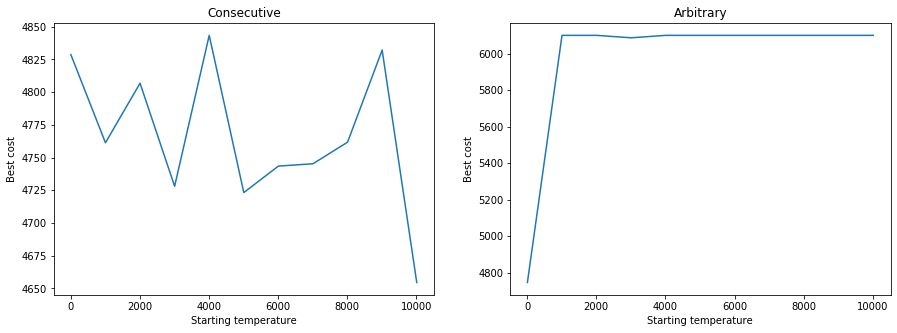

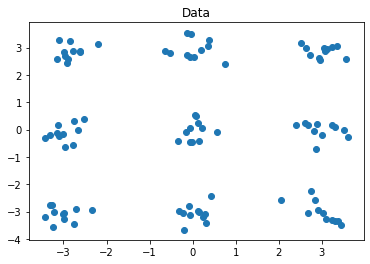

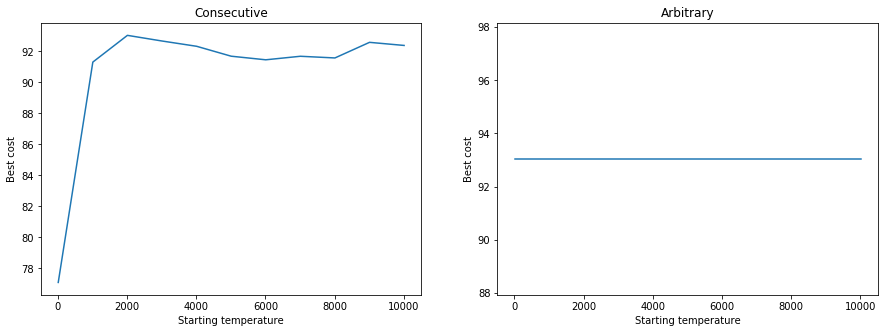

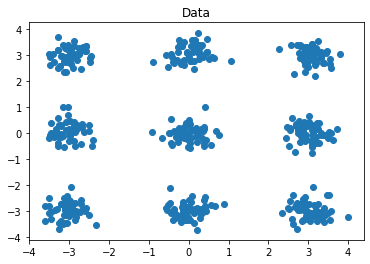

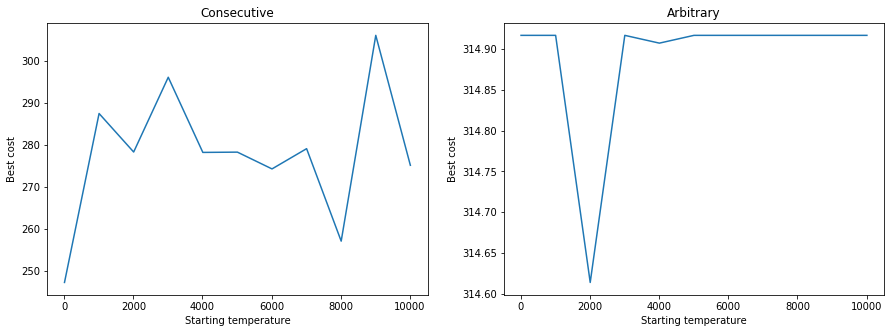

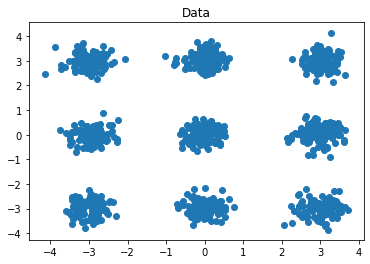

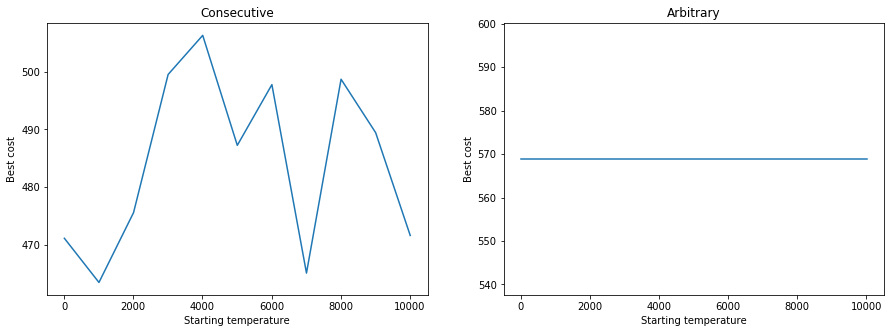

In [11]:
pts, ptsarb, ptscon = genpoints()
for ix in range(len(pts)):
    xs = [i for i in range(10, 10011, 1000)]
    disp(pts[ix], 'Data')
    rescon = []
    resarb = []
    for i in range(10, 10011, 1000):
        ptstmp = cp.deepcopy(pts[ix])
        rescon.append(simannealing(ptscon[ix], cons, 0.995, i, 100000, tempM, ver=False)['cost'])
        ptstmp = cp.deepcopy(pts[ix])
        resarb.append(simannealing(ptsarb[ix], arb, 0.995, i, 100000, tempM, ver=False)['cost'])
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(xs, rescon)
    plt.title('Consecutive')
    plt.xlabel('Starting temperature')
    plt.ylabel('Best cost')
    plt.subplot(1,2,2)
    plt.plot(xs, resarb)
    plt.title('Arbitrary')
    plt.xlabel('Starting temperature')
    plt.ylabel('Best cost')
    plt.show()

Bardzo dziwne wychodzą te zależności między temperaturą a zbieżnością wyżarzania, prawdopodobnie wynika to z nienajlepszych funkcji temperatury i prawdopodobieństwa.\
Rzeczy na które możemy zwrócić uwagę, to na pewno fakt, że dużo zależy od szczęścia i zwiększnie temeratury nie zawsze przekłada się bezpośrednio na lepsze wyniki.

##### c) Przedstaw wizualizację działania procedury minimalizującej funkcję celu

In [12]:
def anim(hist, name='hist.gif'):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    
    ax.set_title(f"iteration={0} loss=" +str(hist[0]['cost']))
    hist[0]['state'] = np.append(hist[0]['state'], hist[0]['state'][0]).reshape((-1,2))
    line = ax.plot(*zip(*hist[0]['state']))[0]
    line.set_color('green')
    
    def anime(key):
        hist[key]['state'] = np.append(hist[key]['state'], hist[key]['state'][0]).reshape((-1,2))
        line.set_data(*zip(*hist[key]['state']))
        if hist[key]['acc']==True:
            line.set_color('green')
        else:
            line.set_color('red')
            
        ax.set_title(f'iteration={key} loss='+str(hist[key]['cost']))
    
    anim = FuncAnimation(fig, anime, interval=500, frames=len(hist))
    anim.save(name, writer='pillow')

60
60
60
60
60
60


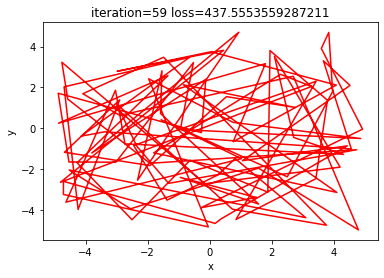

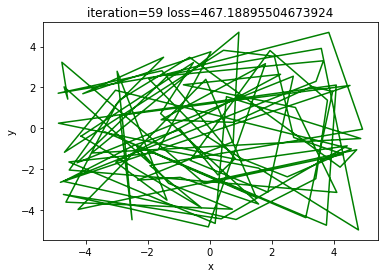

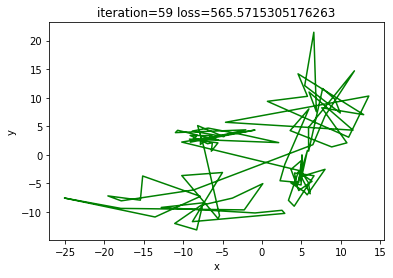

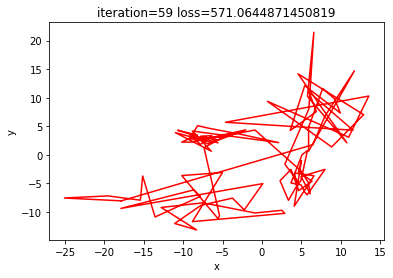

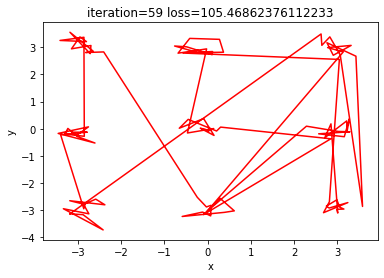

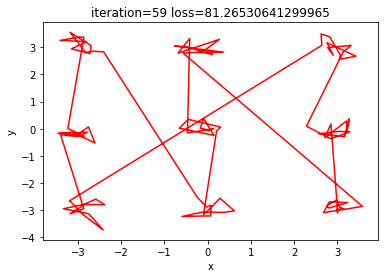

In [13]:
pts, ptsarb, ptscon = genpoints(True)
for ix in range(len(pts)):
    bstcon,histcon = simannealing(ptscon[ix], cons, 0.70, 10, 1000, tempM, his=True)
    bstarb,histarb = simannealing(ptsarb[ix], arb, 0.70, 10, 1000, tempM, his=True)
    anim(histarb, f'arb{ix}.gif')
    anim(histcon, f'con{ix}.gif')

Ze względu na duże obciążenie pamięci i czasu ograniczyłem liczbę klatek do 60.\
Kolor czerwony symbolizuje stan odrzucony, zielony - stan zaakceptowany.\
Bardzo ładnie można zaobserwować, jakie zmiany proponują odpowiednie podejścia, szczeóglnie przy tych bardziej uporządkowanych gdzie widać, że consecutive zamienia kolejnością miejsca stosunkowo niedaleko od siebie.

### <center> Arbitrary Jednostajny </center>
![SegmentLocal](arb0.gif "segment")
### <center> Consecutive Jednostajny </center>
![SegmentLocal](con0.gif "segment")
### <center> Arbitrary Normalny </center>
![SegmentLocal](arb1.gif "segment")
### <center> Consecutive Normalny </center>
![SegmentLocal](con1.gif "segment")
### <center> Abritrary 9 grup </center>
![SegmentLocal](arb2.gif "segment")
### <center> Consecutive 9 grup </center>
![SegmentLocal](con2.gif "segment")